# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 23 (Friday) 11:00 pm </b> </font>

<font color="blue"> Yike Li </font>

# I. Introduction

<font color="blue"> Describe the objective of this assignment. You can briefly state how you accompilsh it. </font>

The assignment is asking us to create classes for classification models: pocket algorithm, discriminant analysis, and logistic regression. The assignment was done mostly using the workbook given in class. The pocket algorithm itself is not a classification algorithm but a memory algorithm to store the historical fitting parameter and its corresponding performance, the perceptron algorithm is used to compute the weights associated with each input feature. Both discriminant analysis and logistic regression construct high dimensional decision boundaries to separate different classes. Most of the function was already given in the class notes, incorporate them in one class definition and create additional data quality checking function is the main challenge here.  

# II. Data

<font color="blue"> Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

In this assignment I chose an open access dataset instead of the data within Assignment #0, which was from a proprietary source. 

The context of this dataset is that a Taiwan-based credit card issuer wants to better predict the likelihood/probability of default for its customers at the following month, as well as identify the key drivers that determine this likelihood. This can inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

This dataset contains information on 30000 customers and each with 24 features, including demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005, as well as the outcome of whether the customer default or not. The dataset can be downloaded from this [link](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). 

Below gives the descriptions of the 24 features and the last row - "default.payment.next.month", is the binary target variable, indicating whether the client defaulted for the following month (Oct 2005). 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- **default.payment.next.month: Did the customer default (1=yes, 0=no)**

The following cell imports all used packages and the dataset. 

In [12]:
# import
import numpy as np
import pandas as pd
import sys, os
from scipy.special import expit  # logistic sigmoid function
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()

# Load the UCI_Credit_Card dataset
user = 'Administrator'
df = pd.read_csv(f'C:/Users/{user}/Dropbox/Misc/ITCS 8156/HW/UCI_Credit_Card.csv')
df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

Take a look at the first five rows.

In [13]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Observing the statistics of each variable, we can see that the average age of the customers is 35.5. The mean available credit is 167k while the std is quite large. The maximum credit limit is 1M. From our target variable, "default.payment.next.month", the mean of 0.221 suggests that there are about 22.1% customers will default in the next month. 

In [14]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Plots for Analysis & Preliminary Observation

The following plot shows a histogram for each variable in the dataset.

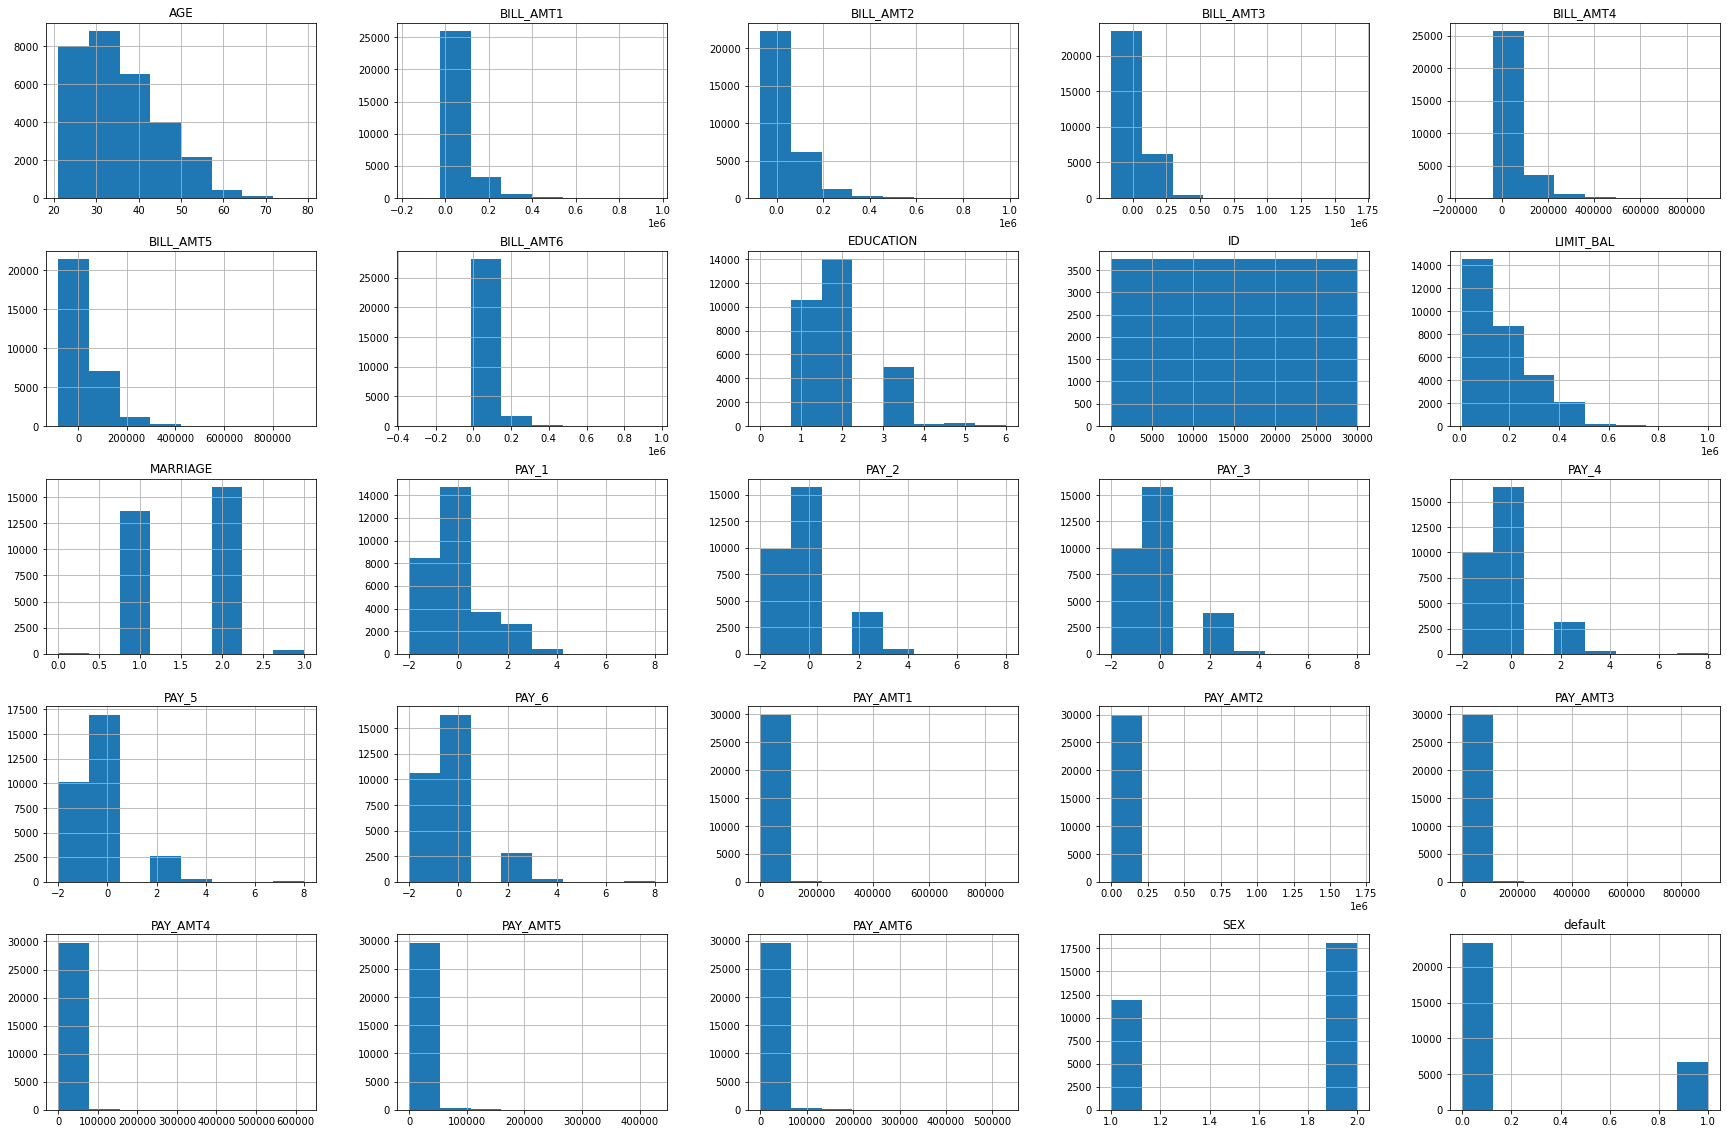

In [15]:
df.hist(figsize=(30,20), bins=8)
plt.show()

Next, we want to get an idea of the features that can be considered to separate the target variable, such that in the later stage, we can use the features that have most discriminatory power in our classification model. 

First, I use the following plots to show the repayment status (PAY_1 - PAY_6, each has 12 states of status), amount of previous payment (PAY_AMT1 - PAY_AMT6), and amount of billing statement (BILL_AMT1 - BILL_AMT6) at each month for non-defaulted (class=0, left plots) and defaulted (class=1, right plots) customers. 

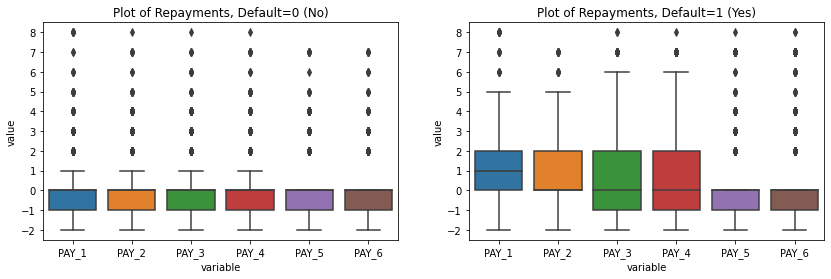

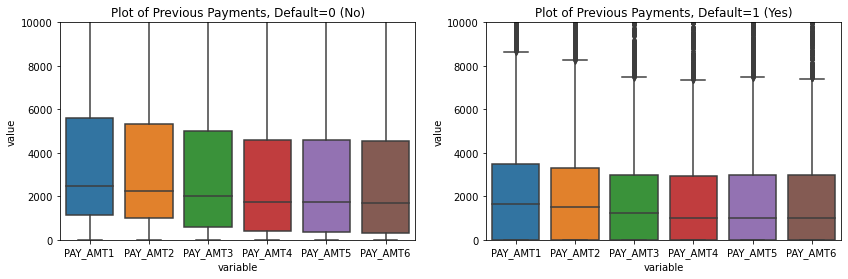

Non-defaulted customers:
             PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   23364.000000  2.336400e+04   23364.000000   23364.000000   
mean     6307.337357  6.640465e+03    5753.496833    5300.529319   
std     18014.508990  2.530226e+04   18684.255937   16689.778060   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1163.750000  1.005000e+03     600.000000     390.000000   
50%      2459.500000  2.247500e+03    2000.000000    1734.000000   
75%      5606.250000  5.311250e+03    5000.000000    4602.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   23364.000000   23364.000000  
mean     5248.220296    5719.371769  
std     16071.667860   18792.950473  
min         0.000000       0.000000  
25%       369.000000     300.000000  
50%      1765.000000    1706.000000  
75%      4600.000000    4545.000000  
max    426529.000000  528666.000000   

Defaulted custome

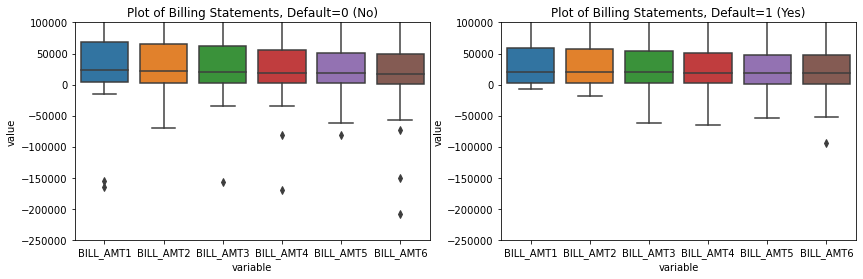

In [16]:
def filter_df(data, col_from='PAY_1', col_to='PAY_6'):
    """Select subset columns from dataframe"""
    data_plot = data.iloc[:, data.columns.get_loc(col_from):data.columns.get_loc(col_to) + 1]
    return data_plot


def multivariate_boxplot(title, col_from, col_to, set_yticks=False, yticks=np.arange(-2, 8 + 1, 1),
                         set_ylim=False, ylim=(0, 1.25e6)):
    """Produce boxplots that include multiple columns in dataframe. """
    plt.figure(figsize=(14, 4))
    ax1 = plt.subplot(121)
    df_plot = filter_df(df_0, col_from=col_from, col_to=col_to)
    sns.boxplot(x='variable', y='value', data=pd.melt(df_plot))  # PAY_1 - PAY_6
    if set_yticks:
        plt.yticks(yticks)
    if set_ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.title(f'Plot of {title}, Default=0 (No)')
    ax2 = plt.subplot(122, sharey=ax1)  # share the y axis of ax1
    df_plot = filter_df(df_1, col_from=col_from, col_to=col_to)
    sns.boxplot(x='variable', y='value', data=pd.melt(df_plot))  # PAY_1 - PAY_6
    plt.title(f'Plot of {title}, Default=1 (Yes)')
    plt.show()


def univariate_plot(title, col):
    """Produce barcharts for a single variable, grouped by default status. """
    group_df = df.groupby(['default', col])[col].count().unstack(0)
    group_df.iloc[:, 0] = 100 * group_df.iloc[:, 0] / group_df.iloc[:, 0].sum()  # convert to %
    group_df.iloc[:, 1] = 100 * group_df.iloc[:, 1] / group_df.iloc[:, 1].sum()  # convert to %
    ax = group_df.plot.bar(title=f'"Default" status by {title}', figsize=(12, 4))
    ax.set_ylabel('Percentage')
    plt.show()


df_0 = df[df['default'] == 0]
df_1 = df[df['default'] == 1]

# For repayments
multivariate_boxplot(title='Repayments', col_from='PAY_1', col_to='PAY_6', set_yticks=True)
# For previous payments
multivariate_boxplot(title='Previous Payments', col_from='PAY_AMT1', col_to='PAY_AMT6', set_ylim=True, ylim=(0, 1e4))
print('Non-defaulted customers:\n', df_0.loc[:, 'PAY_AMT1': 'PAY_AMT6'].describe(), '\n')
print('Defaulted customers:\n', df_1.loc[:, 'PAY_AMT1': 'PAY_AMT6'].describe())

# For billing statements
multivariate_boxplot(title='Billing Statements', col_from='BILL_AMT1', col_to='BILL_AMT6', set_ylim=True,
                     ylim=(-0.25e6, 1e5))

From the above plots, we observe that the Repayment status is very different between the defaulted customers and the non-defaulted ones. The defaulted customers were more likely to have payment delays during June-September, 2005 (PAY_1 - PAY_4). From the plots of Previous Payments and the statistics, we observe the non-defaulted customers tend to pay more than the defaulted ones. Regarding the billing statements, these two types of customers were close. 

Then we look at the remaining variables, such as credit limit, sex, education, marriage status and age information. From the statistics and plots below, we can tell that:
- The non-defaulted customers were granted with higher credit limits.
- Male is more likely to gain "default" status than female .
- If a person is married, then he/she is more likely to gain "default" status than being single.
- A person who went to a graduate school has lower chance of getting "default" than a person who only went to an university or high school.

**Up until now, we have identified the following variables to be used in the modeling stage**:
- (Categorical) **Repayment status: PAY_1 - PAY_4**
- (Numerical) **Previous payments: PAY_AMT1 - PAY_AMT6**
- (Numerical) **LIMIT_BAL**, (Categorical) **SEX, EDUCATION, MARRIAGE**

Non-defaulted customers:
             LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    23364.000000  23364.000000  23364.000000  23364.000000  23364.000000
mean    178099.726074      1.614150      1.841337      1.558637     35.417266
std     131628.359660      0.486806      0.806780      0.520794      9.077355
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      70000.000000      1.000000      1.000000      1.000000     28.000000
50%     150000.000000      2.000000      2.000000      2.000000     34.000000
75%     250000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000 

Defaulted customers:
            LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE
count    6636.000000  6636.000000  6636.000000  6636.000000  6636.000000
mean   130109.656420     1.567058     1.894665     1.528029    35.725738
std    115378.540571     0.49

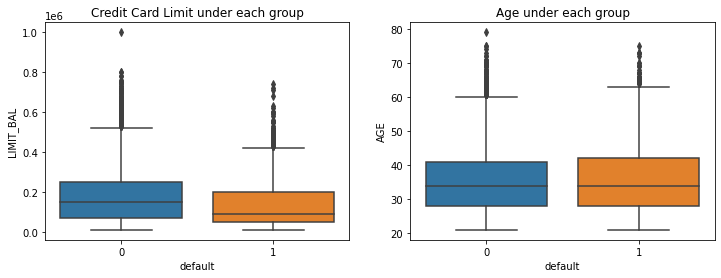

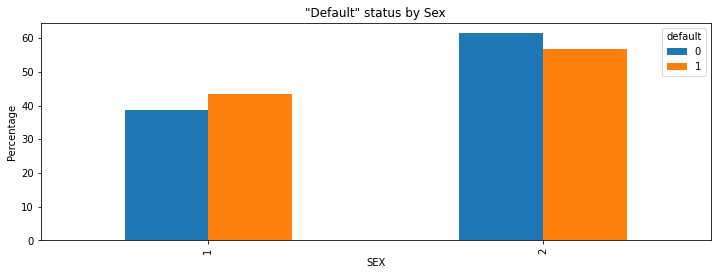

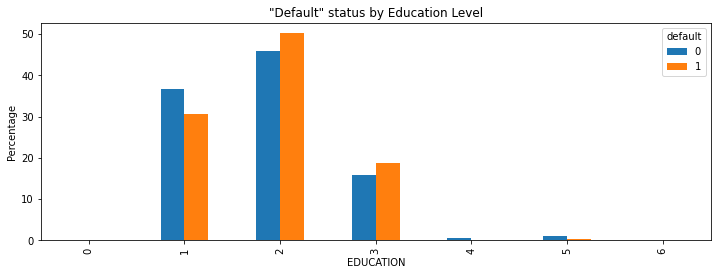

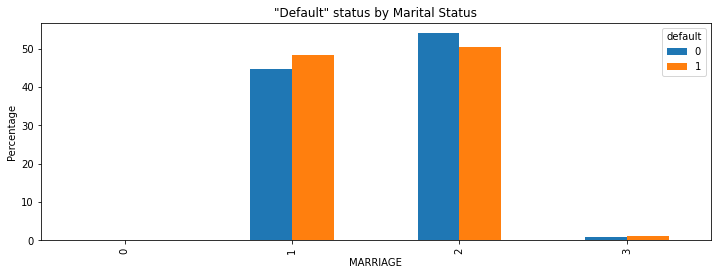

In [17]:
# For other variables in general
print('Non-defaulted customers:\n',
      df_0[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe(), '\n')
print('Defaulted customers:\n', df_1[[
      'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe(), '\n')


def univariate_plot(title, col):
    """Produce barcharts for a single variable, grouped by default status. """
    group_df = df.groupby(['default', col])[col].count().unstack(0)
    group_df.iloc[:, 0] = 100 * group_df.iloc[:, 0] / group_df.iloc[:, 0].sum()  # convert to %
    group_df.iloc[:, 1] = 100 * group_df.iloc[:, 1] / group_df.iloc[:, 1].sum()  # convert to %
    ax = group_df.plot.bar(title=f'"Default" status by {title}', figsize=(12, 4))
    ax.set_ylabel('Percentage')
    plt.show()


# Credit card limit and age boxplot
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.boxplot(x='default', y='LIMIT_BAL', data=df[['LIMIT_BAL', 'default']])
plt.title('Credit Card Limit under each group')
plt.subplot(122)
sns.boxplot(x='default', y='AGE', data=df[['AGE', 'default']])
plt.title('Age under each group')
plt.show()

# sex, education, marriage bar chart, with percentage
univariate_plot(title='Sex', col='SEX')
univariate_plot(title='Education Level', col='EDUCATION')
univariate_plot(title='Marital Status', col='MARRIAGE')

# III. Method

<font color="blue"> Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description

## A. Super Classes Definition

<font color="blue">We first define the super class for classification algorithms. You only need to complete the normalize() method. You don't need to modify anything else. <font color="blue">

The following cell contains all common methods used in all classifiers. In the `normalize` method, I define that if there is one column whose standard deviation is 0, then its standard deviation will be replaced by 1. This avoids the denominator being 0 during the normalization step. 

In [18]:
from abc import ABC, abstractmethod


# Super class for machine learning models
class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""

    @abstractmethod
    def train(self, X, T):  # for training
        pass

    @abstractmethod
    def use(self, X):  # for prediction
        pass


class Classifier(BaseModel):
    """ Abstract class for classification

        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self):  # initialize meanX and stdX is None. Will be updated when invoking normalize method
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        if not isinstance(X, np.ndarray):  # if X is not a numpy array, convert to numpy array
            X = np.asanyarray(X)

        if self.meanX is None:
            self.meanX = np.mean(X, 0)  # axis=0, get mean at each column
            self.stdX = np.std(X, 0)
            if self.stdX.all() == False:  # report if std of any columns is 0
                self.stdX[self.stdX == 0] = 1  # replace 0 std with 1
        Xs = (X - self.meanX) / self.stdX

        return Xs

    def _check_matrix(self, mat, name):  # check input should be a 2-D matrix
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))

    # add a column basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

## B. Pocket Algorithm


### Summary of Pocket Algorithm

The pocket algorithm keeps the best result through the previous iterations so far into the pocket. The best result means the number of misclassification is minimum. 

### Implementation & Description

The pocket algorithm itself does not include the weight update and the perceptron learning algorithm is used to update the  weight at each iteration.

The weights in the pocket are updated as the following: If the new weights produce fewer misclassification than the weights in the pocket, then the new weights will replace the weights in the pocket. If the new weights are not better than the one in the pocket on classifying the samples, the weights in the pocket will be kept and the new weights will be discarded. At the end of the training process, the algorithm will return the weights solution in the pocket, instead of the weights in the last iteration.

Also in the following implementation, we can choose to output the probabilities instead of crisp predicted labels. In the `use` method, there is a step to convert the output to probabilities within 0 to 1. 

In [19]:
class PocketPerceptron(Classifier, object):  # include 'object' to show print in Classifier

    # initialization
    def __init__(self, maxiter=100, alpha=0.1):  # 默认maxiter为100，但可从外部改
        Classifier.__init__(self)  # 沿用Classifier的__init__, 对meanX, stdX初始化
        self.maxiter = maxiter
        self.alpha = alpha  # default learning rate
        self.w = None
        self.w_pocket = None

    # weights comparison function
    def compare(self, X, T, w, wp):
        y1 = np.sign(X @ w)
        y2 = np.sign(X @ wp)
        # print(f'From update weight: {np.sum(y1 == T)}. From pocket weight: {np.sum(y2 == T)}')
        return 1 if np.sum(y1 == T) >= np.sum(y2 == T) else -1  # if w leads to better classification, return 1

    # training
    def train(self, X, T):
        T = np.asanyarray(T)
        Xs = self.normalize(X)  # Xs is normalized from X
        X1 = self.add_ones(Xs)  # add 1 to standardized X

        self.w = np.zeros(X1.shape[1])
        self.w_pocket = np.copy(self.w)  # numpy deep copy

        for i in range(self.maxiter):
            converged = True
            #print(f'PocketPerceptron, Iteration={i + 1}.')
            for k in np.random.permutation(len(X1)):
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):  # randomly choose wrong classification point
                    self.w += self.alpha * T[k] * X1[k]  # update weight
                    converged = False  # maintain converged to be false
                    if self.compare(X1, T, self.w, self.w_pocket) == 1:
                        self.w_pocket = np.copy(self.w)
            if converged:
                print(f"Converged at iteration {i}.")
                break
        print(f"Maximum iteration {self.maxiter} is met, training process terminated.")

    # fitting
    def use(self, X, sign=True, conv_prob=False):
        """sign=True means output the sign; else, output raw. conv_prob is used to convert to 0-1 output. """
        Xs = self.normalize(X)  # Xs is normalized from X
        X1 = self.add_ones(Xs)  # add 1 to standardized X
        if sign:
            output = np.sign(X1 @ self.w_pocket)  # return -1 if <0 and 1 if >0
        else:
            output = X1 @ self.w_pocket
            if conv_prob:
                output = (output - np.min(output)) / np.ptp(output)
        return output

## C. QDA

### Summary of Quadratic Discriminant Analysis

Quadratic discriminant analysis (QDA) is a classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using the Bayes Rule. QDA assumes the observations of each class were drawn from a normal distribution (same as LDA), while assumes that each class has its own covariance matrix (different from LDA)

QDA is particularly useful if there is prior knowledge that individual classes exhibit distinct covariances. A disadvantage of QDA is that it cannot be used as a dimensionality reduction technique.

### Implementation & Description 

The `train` method calculates the mean, covariance and prior in the training dataset, there is actually not train performed but measurement calculation for the `use` method. The `use` method will use the mean, covariance and prior gathered in the "train" method and compute the discriminant function on the test data using the `QDA_score` method. Also in the `use` method, we can choose to output a crisp output (by comparing the discriminant function value of each class), or output a probability of a customer being "default" by using a softmax transformation. 

In [20]:
class QuadraticDiscriminantAnalysis(Classifier, object):  # include 'object' to show print in Classifier

    # initialization
    def __init__(self):  # No maxiter and alpha in QDA. Need to define mean, std, mu, sigma, prior prob
        Classifier.__init__(self)  # 沿用Classifier的__init__, 对meanX, stdX初始化
        self.mu_list = []  # stores mu for class 0 and 1
        self.sigma_list = []  # stores cov matrix for class 0 and 1
        self.prior_list = []  # stores prior for class 0 and 1
        self.scores_list = []  # stores the output scores of each test observation

    # compute discriminant function
    def QDA_score(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)  # use psuedo inverse if needed
        first = -1 / 2 * np.log(np.linalg.det(sigma))
        second = -1 / 2 * np.sum((X - mu) @ sigma_inv * (X - mu), axis=1)  # 横着求和
        third = np.log(prior)

        return first + second + third

    # training
    def train(self, X, T):
        global T_col  # use global T_col='default'
        Xs = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # normalize the df, need it for QDA and LDA
        tr = pd.concat([Xs, T], axis=1)  # concatenate, then followed with group by
        self.mu_list = np.split(tr.groupby(T_col).mean().values, 2)  # cut into 2 mean arrays, 1st for T=0, 2nd for T=1
        self.sigma_list = np.split(tr.groupby(T_col).cov().values, 2, axis=0)  # cut into 2 cov matrices, 1st for T=0
        self.prior_list = T.value_counts().values / len(T)  # update prior prob from training data

    # fitting
    def use(self, X, sign=True):
        """sign=True means output the sign; else, output raw. conv_prob is used to convert to 0-1 output. """
        Xs = self.normalize(X)  # Xs is normalized from X
        self.scores_list = []  # every use, reset the scores list
        
        classes = len(self.mu_list)  # return no. of classes, here is 2

        for k in range(classes):
            score = self.QDA_score(Xs, self.mu_list[k], self.sigma_list[k], self.prior_list[k])
            self.scores_list.append(score)

        if sign:
            output = np.where(self.scores_list[0] > self.scores_list[1], 0, 1)  # generate crisp output
        else:
            top = np.exp(self.scores_list[1])
            bottom = np.exp(self.scores_list[0]) + np.exp(self.scores_list[1])
            bottom[bottom == 0] = 1  # replace any 0 in denominator with 1
            output = top / bottom  # softmax to convert discriminant funtion score to probabilities of being 1

        return output

## D. LDA

### Summary of Linear Discriminant Analysis

Similar to QDA, the linear discriminant analysis (LDA) is a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes rule. The model fits a Gaussian density to each class, assuming that the measurements are normally distributed. Different from QDA, LDA assumes each feature has the same variance, which suggests the values of each feature vary around the mean by the same amount on average.

### Implementation & Description 

The `train` method calculates the mean, covariance and prior in the training dataset, there is actually not train performed but measurement calculation for the `use` method. The `use` method will use the mean, covariance and prior gathered in the "train" method and compute the discriminant function on the test data using the `LDA_score` method. Also in the `use` method, we can choose to output a crisp output (by comparing the discriminant function value of each class), or output a probability of a customer being "default" by using a softmax transformation. 

In [21]:
class LinearDiscriminantAnalysis(Classifier, object):  # include 'object' to show print in Classifier

    # initialization
    def __init__(self):  # No maxiter and alpha in QDA. Need to define mean, std, mu, sigma, prior prob
        Classifier.__init__(self)  # 沿用Classifier的__init__, 对meanX, stdX初始化
        self.mu_list = []  # stores mu for class 0 and 1
        self.sigma = None  # stores cov matrix for both classes (same)
        self.prior_list = []  # stores prior for class 0 and 1
        self.scores_list = []  # stores the output scores of each test observation

    # compute discriminant function
    def LDA_score(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)  # use psuedo inverse if needed
        first = np.sum(X @ sigma_inv * mu, axis=1)  # 横着求和
        second = -1 / 2 * np.sum(mu @ sigma_inv * mu, axis=1)
        third = np.log(prior)

        return first + second + third

    # training
    def train(self, X, T):
        global T_col  # use global T_col='default'
        Xs = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # normalize the df, need it for QDA and LDA
        tr = pd.concat([Xs, T], axis=1)  # concatenate, then followed with getting the mu, sigma and prior
        self.mu_list = np.split(tr.groupby(T_col).mean().values, 2)  # cut into 2 mean arrays, 1st for T=0, 2nd for T=1
        self.sigma = Xs.cov().values  # cov matrix for Xs
        self.prior_list = T.value_counts().values / len(T)  # update prior prob from training data

    # fitting
    def use(self, X, sign=True):
        """sign=True means output the sign; else, output raw. conv_prob is used to convert to 0-1 output. """
        Xs = self.normalize(X)  # Xs is normalized from X
        self.scores_list = []  # every use, reset the scores list
        
        classes = len(self.mu_list)  # return no. of classes, here is 2

        for k in range(classes):
            score = self.LDA_score(Xs, self.mu_list[k], self.sigma, self.prior_list[k])
            self.scores_list.append(score)

        if sign:
            output = np.where(self.scores_list[0] > self.scores_list[1], 0, 1)  # generate crisp output
        else:
            top = np.exp(self.scores_list[1])
            bottom = np.exp(self.scores_list[0]) + np.exp(self.scores_list[1])
            bottom[bottom == 0] = 1  # replace any 0 in denominator with 1
            output = top / bottom  # softmax to convert discriminant funtion score to probabilities of being 1

        return output

## E. Logistic Regression

### Summary of Logistic Regression

Logistic regression is a regression model that predicts the probability of the class label likelihood instead of the class label. The model uses the cross-entropy error function for multiclass classification problems.

### Implementation & Description

In the `train` method, I have defined two approaches for training, one is to use the SGD (stochastic gradient descent, `use_SGD`=`True`) and the other one is to use BGD (batch gradient descent, `use_SGD`=False). Under each approach, we can choose whether to apply regularization to training parameters by setting `regularize`=`True` and a $\lambda$ value. 

The training procedure is performed iteratively either using SGD or BGD. The `sigmoid` method is used to transform the regression output to values between 0 and 1. The `use` method will fit the updated weights to produce probability for each observation in each class. We can also convert the probabilities into crisp outputs by setting `sign`=`True`.

In [22]:
class LogisticRegression(Classifier, object):

    # initialization
    def __init__(self, maxiter=100, alpha=0.1):  # 默认maxiter为100，但可从外部改
        Classifier.__init__(self)  # 沿用Classifier的__init__, 对meanX, stdX初始化
        self.maxiter = maxiter
        self.alpha = alpha  # default learning rate
        self.w = None

    # sigmoid function, here x can be one obs (one row of training set), or multiple rows (for calculating prob)
    def sigmoid(self, x):
        y_theta = x @ self.w  # compute theta * x
        return expit(y_theta)  # return h_theta

    # training
    def train(self, X, T, use_SGD=False, regularize=False, lamb=1):
        T = np.asanyarray(T)
        Xs = self.normalize(X)  # Xs is normalized from X
        X1 = self.add_ones(Xs)  # add 1 to Xs

        self.w = np.zeros(X1.shape[1])  # initialize w, n+1 dimensions

        for i in range(self.maxiter):
            #print(f'Iteration={i + 1}.')
            if use_SGD:  # use SGD
                for k in np.random.permutation(len(X1)):  # inner loop, go through all observations
                    y = self.sigmoid(X1[k])  # calculate h_theta
                    if not regularize:
                        self.w -= self.alpha * (y - T[k]) * X1[k]  # update weight, 这里是对应元素的相乘, 所以不用@, 用*
                    else:
                        self.w = self.w * (1 - self.alpha * lamb) - self.alpha * (y - T[k]) * X1[k]
            else:  # use batch gradient descent
                y = self.sigmoid(X1)
                if not regularize:
                    self.w -= self.alpha * X1.T @ (y - T)  # update weight
                else:
                    self.w = self.w * (1 - self.alpha * lamb) - self.alpha * X1.T @ (y - T)  # update weight

        print(f"Maximum iteration {self.maxiter} is met, training process terminated.")

    # fitting
    def use(self, X, sign=True):
        """
        sign=True means generate crisp output; else, output raw probabilities.
        """
        Xs = self.normalize(X)  # Xs is normalized from X
        X1 = self.add_ones(Xs)  # add 1 to standardized X

        output = expit(X1 @ self.w)  # output probabilities
        if sign:  # convert probabilities to 0 if <0.5 and 1 if >=0.5
            output[output >= 0.5] = 1
            output[output < 0.5] = 0

        return output

# IV. Experiments

<font color="blue"> Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Evaluation Metrics Discussion

The following function outputs the confusion matrix based on the actual and predicted labels. The horizontal axis is the actual label and vertical axis is the predicted label. The confusion matrix is useful but since it gives a matrix as the output, it is difficult to evaluate different classifiers. 

In [23]:
def confusion_matrix(Y, T):
    """ Y    nd.array
             predicted labels
        T    nd.array
             target labels

        @cfm DataFrame
             confusion matrix
    """

    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")

    classes = np.unique(T)
    n_classes = len(classes)

    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)

    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

    return cfm

The following function creates a measurement for ROC and PR curves, including:
- false-positive rate: false classify rate over the negative class
- true-positive rate (recall, sensitivity): the accuracy over the positive class
- precision: the accuracy of positive predictions 

In [24]:
def roc_pr(Y, T, T_neg=-1):
    fprs = []
    tprs = []
    pres = []
    recs = []
    # sorted_i = np.argsort(Y)

    for thres in sorted(Y)[::-1]:  # reverse order of the sorted Y
        n_TP = np.logical_and(Y >= thres, T == 1).sum()
        n_FP = np.logical_and(Y >= thres, T == T_neg).sum()
        n_TN = np.logical_and(Y < thres, T == T_neg).sum()
        n_FN = np.logical_and(Y < thres, T == 1).sum()
        # print(n_TP, n_FP, n_TN, n_FN)
        fpr = n_FP / (n_FP + n_TN)
        tpr = n_TP / (n_TP + n_FN)
        fprs.append(fpr)
        tprs.append(tpr)
        precision = n_TP / (n_TP + n_FP)
        recall = n_TP / (n_TP + n_FN)
        pres.append(precision)
        recs.append(recall)

    return fprs, tprs, recs, pres

The following function creates a measurement for ROC and PR curves, including:
- F1 score: a single measure that combines precision and recall, the harmonic mean of precision and recall
- Matthews Correlation Coefficient (MCC): takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes

F1 score and MCC are convenient to use since it is a single measurement to evaluate classifiers.

In [25]:
def single_measure(Y, T, out_mcc=False, T_neg=0):
    """
    F1 score:[0, 1], 1=best
    mcc: [-1, 1], 1=best, 0=noskill, -1=worst

    """
    n_TP = np.logical_and(Y == 1, T == 1).sum()
    n_FP = np.logical_and(Y == 1, T == T_neg).sum()
    n_TN = np.logical_and(Y == T_neg, T == T_neg).sum()
    n_FN = np.logical_and(Y == T_neg, T == 1).sum()
    f1 = n_TP / (n_TP + (n_FN + n_FP) / 2)
    if out_mcc == True:
        mcc = (n_TP * n_TN - n_FP * n_FN) / (np.sqrt((n_TP + n_FP) * (n_TP + n_FN) * (n_TN + n_FP) * (n_TN + n_FN)))
        return f1, mcc
    else:
        return f1

The following functions plot the ROC curve and the PR curve. ROC curve plots True Positive Rate (TPR) against False Positive Rate (FPR) and is independent of the selection of the threshold. We should prefer the PR curve whenever the positive class is rare or when we care more about the false positives than the false negatives, and the ROC curve otherwise. 

In [26]:
# plot ROC curve
def roc_curve(fprs, tprs, title='ROC curve'):
    global label
    plt.plot(fprs, tprs, label=f'{label}')
    plt.title(title)
    plt.xlabel("P(FP)")
    plt.ylabel("P(TP)")
    plt.plot([0, 1], [0, 1], color='lightgrey', linestyle='--')  # add dashed line for dumb classifier
    plt.legend(loc='lower right', prop={'size': 10})

# plot PR curve
def pr_curve(recs, pres, title='PR curve'):
    global label
    plt.plot(recs, pres, label=f'{label}')
    plt.title(title)
    no_skill = np.sum(T_tst == 1) / len(T_tst)
    plt.plot([0, 1], [no_skill, no_skill], color='lightgrey', linestyle='--')  # dashed line for noskill
    plt.xlabel("Recall")
    plt.ylabel("Precesion")
    plt.legend(loc='upper right', prop={'size': 10}) 

## Training & Testing Accuracies Discussion

Since none of the classification models here include a built-in generalization performance validation, it is necessary to test the model on a new test dataset or introduce regularization to ensure generalization performance. Especially for logistic regression since the regression model has the tendency to overfit the training data. 

In this assignment, I use three different metrics: ROC curve, F1 score and MCC score. In the later sections, we will show the training performance as well as the test performance under each method. 

The following cell defines a `preprocess` function to process the data, which includes creating dummy variables for the categorical features, drop the categorical columns that have too few positive class labels in data, and the data partitioning. In the data partitioning step, we can choose `cv`=5 if we desire to create dataframes for different folds. This option will be used in the Extra Credit section. 

In [27]:
def preprocess(data, T_neg=0, drop_thres=50, drop_first=True, pct=0.2, cv=0, seed=1):
    """
    Dummy coding, Drop dummy variables with too few positive class labels, and then Split data.
    data: input data, T_col: the column name of Target
    T_neg: whether the negetive class should be labeled as -1, or 0
    drop_thres: Drop dummy variables with too few positive class labels in data
    drop_first: whether to get k-1 dummies to avoid colinearity issue
    pct: percentage of test data.
    cv can be False or an assigned int.
    """
    # dummy codings
    global dummy_cols, T_col  # use the global variables
    data = pd.get_dummies(data=data, columns=dummy_cols, drop_first=drop_first)
    data = data.loc[:, data.sum() > drop_thres]

    # replace target col 0 with -1. This needs to be done after data = data.loc[:, data.sum() > drop_thres]
    if T_neg == -1:
        data = data.replace(to_replace={'default': 0}, value=-1)

    if cv == 0:
        # split, stratified by target label
        test = data.groupby(T_col, group_keys=False).apply(lambda x: x.sample(frac=pct, random_state=seed))
        tr = data.loc[~data.index.isin(test.index)]  # get rows that indices not in test
        X_tr, T_tr, X_tst, T_tst = tr.drop(T_col, axis=1), tr[T_col], test.drop(T_col, axis=1), test[T_col]

        return X_tr, T_tr, X_tst, T_tst

    else:  # if using CV, pct is then no use
        data = data.sample(frac=1).reset_index(drop=True)  # shuffle rows first

        test1 = data.iloc[0 * int(len(data) / cv):1 * int(len(data) / cv), :]
        test2 = data.iloc[1 * int(len(data) / cv):2 * int(len(data) / cv), :]
        test3 = data.iloc[2 * int(len(data) / cv):3 * int(len(data) / cv), :]
        test4 = data.iloc[3 * int(len(data) / cv):4 * int(len(data) / cv), :]
        test5 = data.iloc[4 * int(len(data) / cv):5 * int(len(data) / cv) + 1, :]
        tr1 = data.loc[~data.index.isin(test1.index)]
        tr2 = data.loc[~data.index.isin(test2.index)]
        tr3 = data.loc[~data.index.isin(test3.index)]
        tr4 = data.loc[~data.index.isin(test4.index)]
        tr5 = data.loc[~data.index.isin(test5.index)]

        cv_data_list = []  # list to store 5 different training/test data
        # cv_data_list[0]: 1st fold. cv_data_list[0][0]: X_tr1
        # X_tr, T_tr, X_tst, T_tst
        cv_data_list.append([tr1.drop(T_col, axis=1), tr1[T_col], test1.drop(T_col, axis=1), test1[T_col]])
        cv_data_list.append([tr2.drop(T_col, axis=1), tr2[T_col], test2.drop(T_col, axis=1), test2[T_col]])
        cv_data_list.append([tr3.drop(T_col, axis=1), tr3[T_col], test3.drop(T_col, axis=1), test3[T_col]])
        cv_data_list.append([tr4.drop(T_col, axis=1), tr4[T_col], test4.drop(T_col, axis=1), test4[T_col]])
        cv_data_list.append([tr5.drop(T_col, axis=1), tr5[T_col], test5.drop(T_col, axis=1), test5[T_col]])

        return cv_data_list

    
var_list = ['PAY_%d' % i for i in range(1, 4 + 1)] + ['PAY_AMT%d' % i for i in range(1, 6 + 1)] + \
           ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']
# var_list = ['PAY_%d' % i for i in range(1, 2 + 1)] + ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

dummy_cols = ['PAY_%d' % i for i in range(1, 4 + 1)] + ['SEX', 'EDUCATION', 'MARRIAGE']  # cols for dummy
T_col = 'default'
full = df[var_list + ['default']]

### Pocket Algorithm

The following gives the training steps of pocket algorithm. The output also provides the classification performance on both the training and the test set, which includes the confusion matrix, F1 score and MCC score. Finally, the ROC curves and PR curves are plotted based on both the training set and the test set. We can tell that the f1 score and MCC score on the training set is very close to the test set. 

Maximum iteration 10 is met, training process terminated.

Pocket Algorithm Training Set Confusion Matrix:
       -1     1
-1  17860  3537
 1    831  1772
Pocket Algorithm Training Set F1 score: 0.4479
Pocket Algorithm Training Set MCC score: 0.3862

Pocket Algorithm Test Set Confusion Matrix:
      -1    1
-1  4463  873
 1   210  454
Pocket Algorithm Test Set F1 score: 0.4561
Pocket Algorithm Test Set MCC score: 0.3932


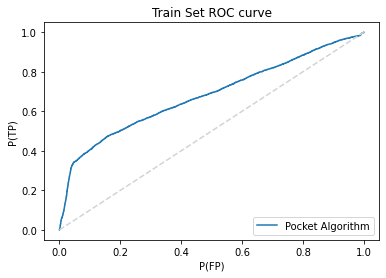

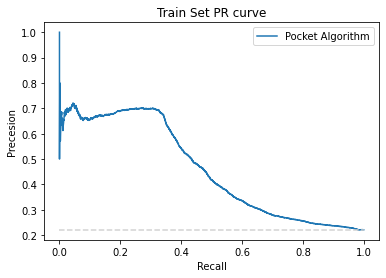

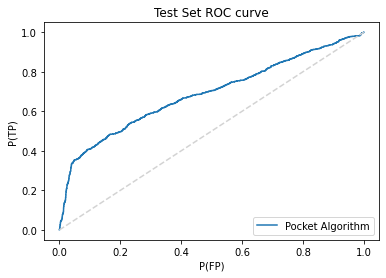

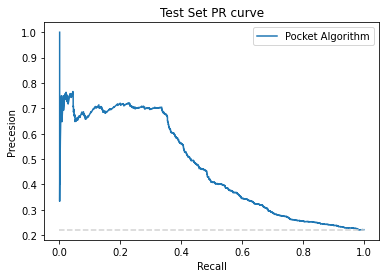

In [17]:
X_tr, T_tr, X_tst, T_tst = preprocess(data=full, T_neg=-1, drop_thres=0, pct=0.2)
pocket = PocketPerceptron(maxiter=10, alpha=0.1)
pocket.train(X_tr, T_tr)
y_label_tr = pocket.use(X_tr)
y_prob_tr = pocket.use(X_tr, sign=False, conv_prob=True)
y_label = pocket.use(X_tst)
y_prob = pocket.use(X_tst, sign=False, conv_prob=True)
label = 'Pocket Algorithm'
# training set
f1, mcc = single_measure(y_label_tr, T_tr, out_mcc=True, T_neg=-1)
print(f'\n{label} Training Set Confusion Matrix:\n{confusion_matrix(y_label_tr, T_tr)}')
print(f'{label} Training Set F1 score: {f1:.4}')
print(f'{label} Training Set MCC score: {mcc:.4}')
# test set
f1, mcc = single_measure(y_label, T_tst, out_mcc=True, T_neg=-1)
print(f'\n{label} Test Set Confusion Matrix:\n{confusion_matrix(y_label, T_tst)}')
print(f'{label} Test Set F1 score: {f1:.4}')
print(f'{label} Test Set MCC score: {mcc:.4}')

fprs_10, tprs_10, recs_10, pres_10 = roc_pr(y_prob_tr, T_tr, T_neg=-1) # train set
roc_curve(fprs_10, tprs_10, title='Train Set ROC curve')
plt.show()
pr_curve(recs_10, pres_10, 'Train Set PR curve')
plt.show()

fprs_1, tprs_1, recs_1, pres_1 = roc_pr(y_prob, T_tst, T_neg=-1)
roc_curve(fprs_1, tprs_1, title='Test Set ROC curve')
plt.show()
pr_curve(recs_1, pres_1, 'Test Set PR curve')
plt.show()

### Quadratic Discriminant Analysis

The following gives the training results of QDA. The output also provides the classification performance on the test set, which includes the confusion matrix, F1 score and MCC score. Finally, the ROC curves and PR curves are plotted based on both the training set and the test set. We can tell that the f1 score and MCC score on the training set is very close to the test set. 


Quadratic Discriminant Analysis Training Set Confusion Matrix:
       0     1
0  15345  2213
1   3346  3096
Quadratic Discriminant Analysis Training Set F1 score: 0.5269
Quadratic Discriminant Analysis Training Set MCC score: 0.3785

Quadratic Discriminant Analysis Test Set Confusion Matrix:
      0    1
0  3838  515
1   835  812
Quadratic Discriminant Analysis Test Set F1 score: 0.5461
Quadratic Discriminant Analysis Test Set MCC score: 0.4029


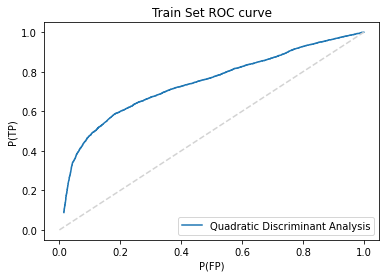

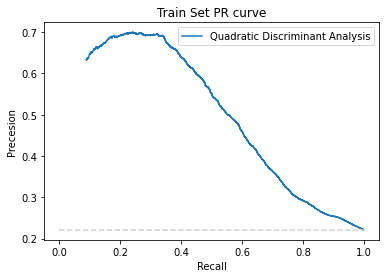

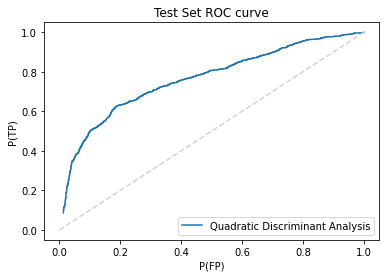

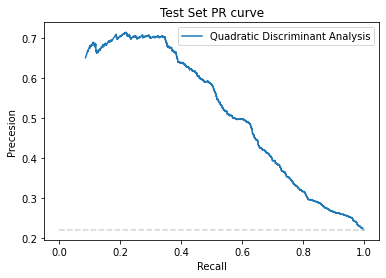

In [18]:
X_tr, T_tr, X_tst, T_tst = preprocess(data=full, T_neg=0, drop_thres=100, drop_first=True, pct=0.2)
qda = QuadraticDiscriminantAnalysis()
qda.train(X_tr, T_tr)  # update mu_list, sigma_list, prior_list
y_label_tr = qda.use(X_tr)
y_prob_tr = qda.use(X_tr, sign=False)
y_label = qda.use(X_tst)
y_prob = qda.use(X_tst, sign=False)
label = 'Quadratic Discriminant Analysis'
# Training set
f1, mcc = single_measure(y_label_tr, T_tr, out_mcc=True, T_neg=0)
print(f'\n{label} Training Set Confusion Matrix:\n{confusion_matrix(y_label_tr, T_tr)}')
print(f'{label} Training Set F1 score: {f1:.4}')
print(f'{label} Training Set MCC score: {mcc:.4}')
# Test set
f1, mcc = single_measure(y_label, T_tst, out_mcc=True, T_neg=0)
print(f'\n{label} Test Set Confusion Matrix:\n{confusion_matrix(y_label, T_tst)}')
print(f'{label} Test Set F1 score: {f1:.4}')
print(f'{label} Test Set MCC score: {mcc:.4}')

fprs_20, tprs_20, recs_20, pres_20 = roc_pr(y_prob_tr, T_tr, T_neg=0) # train set
roc_curve(fprs_20, tprs_20, title='Train Set ROC curve')
plt.show()
pr_curve(recs_20, pres_20, 'Train Set PR curve')
plt.show()

fprs_2, tprs_2, recs_2, pres_2 = roc_pr(y_prob, T_tst, T_neg=0)
roc_curve(fprs_2, tprs_2, title='Test Set ROC curve')
plt.show()
pr_curve(recs_2, pres_2, 'Test Set PR curve')
plt.show()

### Linear Discriminant Analysis

The following gives the training results of LDA. The output also provides the classification performance on the test set, which includes the confusion matrix, F1 score and MCC score. Finally, the ROC curves and PR curves are plotted based on both the training set and the test set. We can tell that the f1 score and MCC score on the training set is very close to the test set. 


Linear Discriminant Analysis Training Set Confusion Matrix:
       0     1
0  17782  3404
1    909  1905
Linear Discriminant Analysis Training Set F1 score: 0.469
Linear Discriminant Analysis Training Set MCC score: 0.4002

Linear Discriminant Analysis Test Set Confusion Matrix:
      0    1
0  4442  864
1   231  463
Linear Discriminant Analysis Test Set F1 score: 0.4582
Linear Discriminant Analysis Test Set MCC score: 0.3886


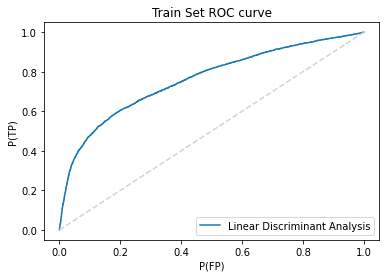

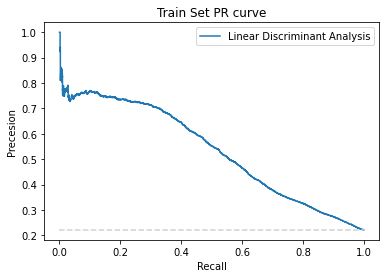

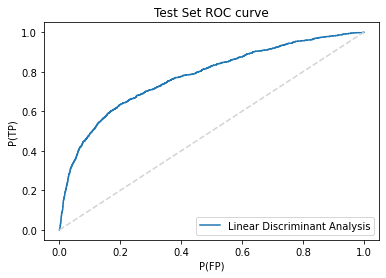

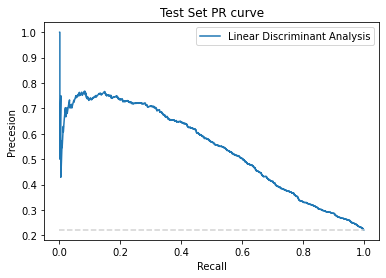

In [19]:
X_tr, T_tr, X_tst, T_tst = preprocess(data=full, T_neg=0, drop_thres=100, drop_first=True, pct=0.2)
lda = LinearDiscriminantAnalysis()
lda.train(X_tr, T_tr)  # update mu_list, sigma_list, prior_list
y_label_tr = lda.use(X_tr)
y_prob_tr = lda.use(X_tr, sign=False)
y_label = lda.use(X_tst)
y_prob = lda.use(X_tst, sign=False)
label = 'Linear Discriminant Analysis'
# Training set
f1, mcc = single_measure(y_label_tr, T_tr, out_mcc=True, T_neg=0)
print(f'\n{label} Training Set Confusion Matrix:\n{confusion_matrix(y_label_tr, T_tr)}')
print(f'{label} Training Set F1 score: {f1:.4}')
print(f'{label} Training Set MCC score: {mcc:.4}')
# Test set
f1, mcc = single_measure(y_label, T_tst, out_mcc=True, T_neg=0)
print(f'\n{label} Test Set Confusion Matrix:\n{confusion_matrix(y_label, T_tst)}')
print(f'{label} Test Set F1 score: {f1:.4}')
print(f'{label} Test Set MCC score: {mcc:.4}')

fprs_30, tprs_30, recs_30, pres_30 = roc_pr(y_prob_tr, T_tr, T_neg=0) # train set
roc_curve(fprs_30, tprs_30, title='Train Set ROC curve')
plt.show()
pr_curve(recs_30, pres_30, 'Train Set PR curve')
plt.show()

fprs_3, tprs_3, recs_3, pres_3 = roc_pr(y_prob, T_tst, T_neg=0)
roc_curve(fprs_3, tprs_3, title='Test Set ROC curve')
plt.show()
pr_curve(recs_3, pres_3, 'Test Set PR curve')
plt.show()

### Logistic Regression

The following gives the training results of logistic regression. The output also provides the classification performance on the test set, which includes the confusion matrix, F1 score and MCC score. Finally, the ROC curves and PR curves are plotted based on both the training set and the test set. We can tell that the f1 score and MCC score on the training set is very close to the test set. 

Maximum iteration 200 is met, training process terminated.

Logistic Regression Training Set Confusion Matrix:
       0     1
0  18041  4368
1    650   941
Logistic Regression Training Set F1 score: 0.2728
Logistic Regression Training Set MCC score: 0.2377

Logistic Regression Test Set Confusion Matrix:
      0     1
0  4514  1116
1   159   211
Logistic Regression Test Set F1 score: 0.2487
Logistic Regression Test Set MCC score: 0.2156


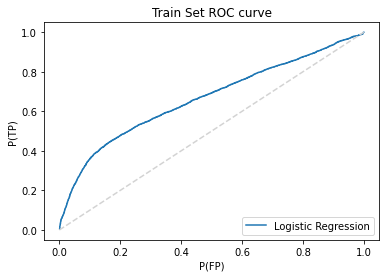

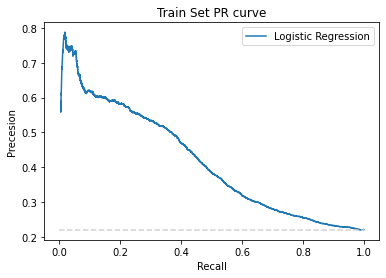

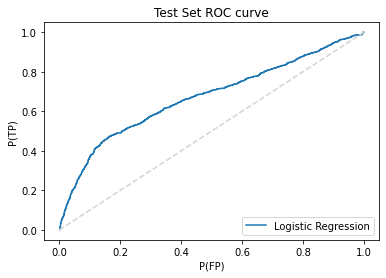

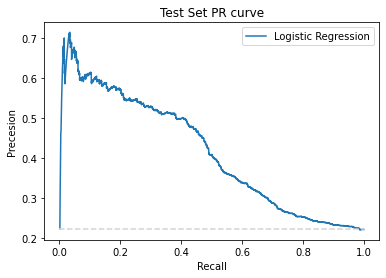

In [20]:
X_tr, T_tr, X_tst, T_tst = preprocess(data=full, T_neg=0, pct=0.2)
logreg = LogisticRegression(maxiter=200, alpha=1e-1)
logreg.train(X_tr, T_tr, use_SGD=True, regularize=False, lamb=0.1)
y_label_tr = logreg.use(X_tr)
y_prob_tr = logreg.use(X_tr, sign=False)
y_label = logreg.use(X_tst)
y_prob = logreg.use(X_tst, sign=False)
label = 'Logistic Regression'

# training set
f1, mcc = single_measure(y_label_tr, T_tr, out_mcc=True, T_neg=0)
print(f'\n{label} Training Set Confusion Matrix:\n{confusion_matrix(y_label_tr, T_tr)}')
print(f'{label} Training Set F1 score: {f1:.4}')
print(f'{label} Training Set MCC score: {mcc:.4}')
# test set
f1, mcc = single_measure(y_label, T_tst, out_mcc=True, T_neg=0)
print(f'\n{label} Test Set Confusion Matrix:\n{confusion_matrix(y_label, T_tst)}')
print(f'{label} Test Set F1 score: {f1:.4}')
print(f'{label} Test Set MCC score: {mcc:.4}')

fprs_40, tprs_40, recs_40, pres_40 = roc_pr(y_prob_tr, T_tr, T_neg=0) # train set
roc_curve(fprs_40, tprs_40, title='Train Set ROC curve')
plt.show()
pr_curve(recs_40, pres_40, 'Train Set PR curve')
plt.show()

fprs_4, tprs_4, recs_4, pres_4 = roc_pr(y_prob, T_tst, T_neg=0)
roc_curve(fprs_4, tprs_4, title='Test Set ROC curve')
plt.show()
pr_curve(recs_4, pres_4, 'Test Set PR curve')
plt.show()

# Conclusions

<font color="blue"> Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

In this section, I use a graph of ROC curves, PR curves and a table to summarize the classifiers' performance on the test set. Based on the ROC curve, we observe the QDA is having close performance to the LDA and both outperforms the remaining two methods. The Pocket Algorithm results in close performance to Logistic Regression. 

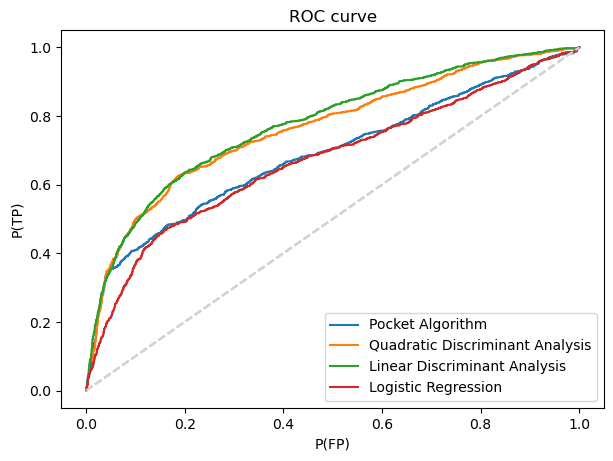

In [21]:
plt.figure(figsize=(7, 5), dpi=100)
label = 'Pocket Algorithm'
roc_curve(fprs_1, tprs_1)
label = 'Quadratic Discriminant Analysis'
roc_curve(fprs_2, tprs_2)
label = 'Linear Discriminant Analysis'
roc_curve(fprs_3, tprs_3)
label = 'Logistic Regression'
roc_curve(fprs_4, tprs_4)

Based on the PR curve, we observe similar findings, that the QDA is having close performance to the LDA and both outperforms the remaining two methods. The Pocket Algorithm results in close performance to Logistic Regression. 

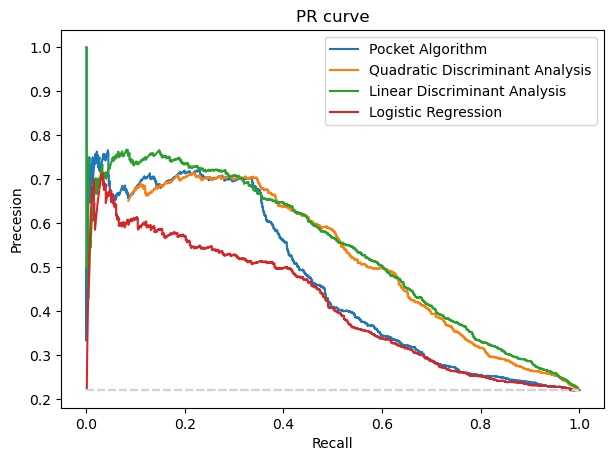

In [22]:
plt.figure(figsize=(7, 5), dpi=100)
label = 'Pocket Algorithm'
pr_curve(recs_1, pres_1)
label = 'Quadratic Discriminant Analysis'
pr_curve(recs_2, pres_2)
label = 'Linear Discriminant Analysis'
pr_curve(recs_3, pres_3)
label = 'Logistic Regression'
pr_curve(recs_4, pres_4)

The table below summarizes the single measure of each method under the test set. Among the four method, we can tell the QDA dominates on both the F1 score and the MCC score. The Logistic Regression gives the worst performance for both the F1 score and the MCC score. **Combining with the ROC curves analysis, we believe the QDA gives the best classification performance under our parameter settings.**

| Method | F1 score | MCC score |
|:--- |:---:|:---:|
| Pocket Algorithm | 0.4561 | 0.3932 |
| QDA | **0.5461** | **0.4029** |
| LDA | 0.4582 | 0.3886 |
| Logistic Regression | 0.2487 | 0.2156 |

# References

(1). UCI_Credit_Card data. Retrieved from https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

I took the **option 2** and partition my data into five sets using the method `preprocess` created in the previous steps. The code below gives the output of four different algorithms. 

In [29]:
#         cv_data_list = []  # list to store 5 different training/test data
#         # cv_data_list[0]: 1st fold. cv_data_list[0][0]: X_tr1
#         # X_tr, T_tr, X_tst, T_tst
#         cv_data_list.append([tr1.drop(T_col, axis=1), tr1[T_col], test1.drop(T_col, axis=1), test1[T_col]])
#         cv_data_list.append([tr2.drop(T_col, axis=1), tr2[T_col], test2.drop(T_col, axis=1), test2[T_col]])
#         cv_data_list.append([tr3.drop(T_col, axis=1), tr3[T_col], test3.drop(T_col, axis=1), test3[T_col]])
#         cv_data_list.append([tr4.drop(T_col, axis=1), tr4[T_col], test4.drop(T_col, axis=1), test4[T_col]])
#         cv_data_list.append([tr5.drop(T_col, axis=1), tr5[T_col], test5.drop(T_col, axis=1), test5[T_col]])


## Pocket Algorithm
# cv_data_list[0]: 1st fold. cv_data_list[0][0]: X_tr1
# X_tr, T_tr, X_tst, T_tst
cv_data_list = preprocess(data=full, T_neg=-1, drop_thres=0, pct=0.2, cv=5)
pocket = PocketPerceptron(maxiter=10, alpha=0.1)
label = 'Pocket Algorithm'
f1_list_tr = []
mcc_list_tr = []
f1_list_test = []
mcc_list_test = []

for i in range(5):
    pocket.train(cv_data_list[i][0], cv_data_list[i][1]) # training
    
    # evaluate on training set
    y_label = pocket.use(cv_data_list[i][0])
    f1, mcc = single_measure(y_label, cv_data_list[i][1], out_mcc=True, T_neg=-1)
    f1_list_tr.append(f1)
    mcc_list_tr.append(mcc)
    print(f'Train Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Train Set {i + 1}, {label} MCC score: {mcc:.4}')
    
    # evaluate on test set
    y_label = pocket.use(cv_data_list[i][2])
    f1, mcc = single_measure(y_label, cv_data_list[i][3], out_mcc=True, T_neg=-1)
    f1_list_test.append(f1)
    mcc_list_test.append(mcc)
    print(f'Test Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Test Set {i + 1}, {label} MCC score: {mcc:.4}')

print(f'\n{label} Average F1 score across CV on training sets: {np.mean(f1_list_tr):.4}')
print(f'{label} Average MCC score across CV on training sets: {np.mean(mcc_list_tr):.4}')
print(f'\n{label} Average F1 score across CV on test sets: {np.mean(f1_list_test):.4}')
print(f'{label} Average MCC score across CV on test sets: {np.mean(mcc_list_test):.4}')

Maximum iteration 10 is met, training process terminated.
Train Set 1, Pocket Algorithm F1 score: 0.4561
Train Set 1, Pocket Algorithm MCC score: 0.3904
Test Set 1, Pocket Algorithm F1 score: 0.4709
Test Set 1, Pocket Algorithm MCC score: 0.409
Maximum iteration 10 is met, training process terminated.
Train Set 2, Pocket Algorithm F1 score: 0.4544
Train Set 2, Pocket Algorithm MCC score: 0.3934
Test Set 2, Pocket Algorithm F1 score: 0.4564
Test Set 2, Pocket Algorithm MCC score: 0.3906
Maximum iteration 10 is met, training process terminated.
Train Set 3, Pocket Algorithm F1 score: 0.4458
Train Set 3, Pocket Algorithm MCC score: 0.3897
Test Set 3, Pocket Algorithm F1 score: 0.4506
Test Set 3, Pocket Algorithm MCC score: 0.3936
Maximum iteration 10 is met, training process terminated.
Train Set 4, Pocket Algorithm F1 score: 0.453
Train Set 4, Pocket Algorithm MCC score: 0.395
Test Set 4, Pocket Algorithm F1 score: 0.4372
Test Set 4, Pocket Algorithm MCC score: 0.3727
Maximum iteration 1

In [30]:
## QDA
cv_data_list = preprocess(data=full, T_neg=0, drop_thres=100, drop_first=True, pct=0.2, cv=5)
qda = QuadraticDiscriminantAnalysis()
label = 'Quadratic Discriminant Analysis'
f1_list_tr = []
mcc_list_tr = []
f1_list_test = []
mcc_list_test = []

for i in range(5):
    qda.train(cv_data_list[i][0], cv_data_list[i][1]) # training
    
    y_label = qda.use(cv_data_list[i][0])
    f1, mcc = single_measure(y_label, cv_data_list[i][1], out_mcc=True, T_neg=0)
    f1_list_tr.append(f1)
    mcc_list_tr.append(mcc)
    print(f'Train Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Train Set {i + 1}, {label} MCC score: {mcc:.4}')
    
    y_label = qda.use(cv_data_list[i][2])
    f1, mcc = single_measure(y_label, cv_data_list[i][3], out_mcc=True, T_neg=0)
    f1_list_test.append(f1)
    mcc_list_test.append(mcc)
    print(f'Test Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Test Set {i + 1}, {label} MCC score: {mcc:.4}')

print(f'\n{label} Average F1 score across CV on training sets: {np.mean(f1_list_tr):.4}')
print(f'{label} Average MCC score across CV on training sets: {np.mean(mcc_list_tr):.4}')
print(f'\n{label} Average F1 score across CV on test sets: {np.mean(f1_list_test):.4}')
print(f'{label} Average MCC score across CV on test sets: {np.mean(mcc_list_test):.4}')

Train Set 1, Quadratic Discriminant Analysis F1 score: 0.5346
Train Set 1, Quadratic Discriminant Analysis MCC score: 0.3863
Test Set 1, Quadratic Discriminant Analysis F1 score: 0.511
Test Set 1, Quadratic Discriminant Analysis MCC score: 0.3637
Train Set 2, Quadratic Discriminant Analysis F1 score: 0.5298
Train Set 2, Quadratic Discriminant Analysis MCC score: 0.3821
Test Set 2, Quadratic Discriminant Analysis F1 score: 0.5299
Test Set 2, Quadratic Discriminant Analysis MCC score: 0.3813
Train Set 3, Quadratic Discriminant Analysis F1 score: 0.5318
Train Set 3, Quadratic Discriminant Analysis MCC score: 0.383
Test Set 3, Quadratic Discriminant Analysis F1 score: 0.5177
Test Set 3, Quadratic Discriminant Analysis MCC score: 0.367
Train Set 4, Quadratic Discriminant Analysis F1 score: 0.5298
Train Set 4, Quadratic Discriminant Analysis MCC score: 0.3849
Test Set 4, Quadratic Discriminant Analysis F1 score: 0.5449
Test Set 4, Quadratic Discriminant Analysis MCC score: 0.3956
Train Set 5

In [31]:
## LDA
preprocess(data=full, T_neg=0, drop_thres=100, drop_first=True, pct=0.2, cv=5)
lda = LinearDiscriminantAnalysis()
label = 'Linear Discriminant Analysis'
f1_list_tr = []
mcc_list_tr = []
f1_list_test = []
mcc_list_test = []

for i in range(5):
    lda.train(cv_data_list[i][0], cv_data_list[i][1])
    
    y_label = lda.use(cv_data_list[i][0])
    f1, mcc = single_measure(y_label, cv_data_list[i][1], out_mcc=True, T_neg=0)
    f1_list_tr.append(f1)
    mcc_list_tr.append(mcc)
    print(f'Train Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Train Set {i + 1}, {label} MCC score: {mcc:.4}')
    
    y_label = lda.use(cv_data_list[i][2])
    f1, mcc = single_measure(y_label, cv_data_list[i][3], out_mcc=True, T_neg=0)
    f1_list_test.append(f1)
    mcc_list_test.append(mcc)
    print(f'Test Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Test Set {i + 1}, {label} MCC score: {mcc:.4}')

print(f'\n{label} Average F1 score across CV on training sets: {np.mean(f1_list_tr):.4}')
print(f'{label} Average MCC score across CV on training sets: {np.mean(mcc_list_tr):.4}')
print(f'\n{label} Average F1 score across CV on test sets: {np.mean(f1_list_test):.4}')
print(f'{label} Average MCC score across CV on test sets: {np.mean(mcc_list_test):.4}')

Train Set 1, Linear Discriminant Analysis F1 score: 0.4683
Train Set 1, Linear Discriminant Analysis MCC score: 0.4003
Test Set 1, Linear Discriminant Analysis F1 score: 0.4471
Test Set 1, Linear Discriminant Analysis MCC score: 0.382
Train Set 2, Linear Discriminant Analysis F1 score: 0.4708
Train Set 2, Linear Discriminant Analysis MCC score: 0.4016
Test Set 2, Linear Discriminant Analysis F1 score: 0.4674
Test Set 2, Linear Discriminant Analysis MCC score: 0.3981
Train Set 3, Linear Discriminant Analysis F1 score: 0.473
Train Set 3, Linear Discriminant Analysis MCC score: 0.4029
Test Set 3, Linear Discriminant Analysis F1 score: 0.4589
Test Set 3, Linear Discriminant Analysis MCC score: 0.3902
Train Set 4, Linear Discriminant Analysis F1 score: 0.4639
Train Set 4, Linear Discriminant Analysis MCC score: 0.397
Test Set 4, Linear Discriminant Analysis F1 score: 0.4723
Test Set 4, Linear Discriminant Analysis MCC score: 0.403
Train Set 5, Linear Discriminant Analysis F1 score: 0.4622
T

In [32]:
## Logistic Regression
preprocess(data=full, T_neg=0, drop_thres=0, pct=0.2, cv=5)
logreg = LogisticRegression(maxiter=200, alpha=1e-1)
label = 'Logistic Regression'
f1_list_tr = []
mcc_list_tr = []
f1_list_test = []
mcc_list_test = []

for i in range(5):
    logreg.train(cv_data_list[i][0], cv_data_list[i][1], use_SGD=True, regularize=False)
    
    y_label = logreg.use(cv_data_list[i][0])
    f1, mcc = single_measure(y_label, cv_data_list[i][1], out_mcc=True, T_neg=0)
    f1_list_tr.append(f1)
    mcc_list_tr.append(mcc)
    print(f'Train Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Train Set {i + 1}, {label} MCC score: {mcc:.4}')
    
    y_label = logreg.use(cv_data_list[i][2])
    f1, mcc = single_measure(y_label, cv_data_list[i][3], out_mcc=True, T_neg=0)
    f1_list_test.append(f1)
    mcc_list_test.append(mcc)
    print(f'Test Set {i + 1}, {label} F1 score: {f1:.4}')
    print(f'Test Set {i + 1}, {label} MCC score: {mcc:.4}')

print(f'\n{label} Average F1 score across CV on training sets: {np.mean(f1_list_tr):.4}')
print(f'{label} Average MCC score across CV on training sets: {np.mean(mcc_list_tr):.4}')
print(f'\n{label} Average F1 score across CV on test sets: {np.mean(f1_list_test):.4}')
print(f'{label} Average MCC score across CV on test sets: {np.mean(mcc_list_test):.4}')

Maximum iteration 200 is met, training process terminated.
Train Set 1, Logistic Regression F1 score: 0.414
Train Set 1, Logistic Regression MCC score: 0.2341
Test Set 1, Logistic Regression F1 score: 0.4015
Test Set 1, Logistic Regression MCC score: 0.2265
Maximum iteration 200 is met, training process terminated.
Train Set 2, Logistic Regression F1 score: 0.459
Train Set 2, Logistic Regression MCC score: 0.3655
Test Set 2, Logistic Regression F1 score: 0.4417
Test Set 2, Logistic Regression MCC score: 0.3401
Maximum iteration 200 is met, training process terminated.
Train Set 3, Logistic Regression F1 score: 0.3946
Train Set 3, Logistic Regression MCC score: 0.2786
Test Set 3, Logistic Regression F1 score: 0.3849
Test Set 3, Logistic Regression MCC score: 0.2739
Maximum iteration 200 is met, training process terminated.
Train Set 4, Logistic Regression F1 score: 0.3878
Train Set 4, Logistic Regression MCC score: 0.2961
Test Set 4, Logistic Regression F1 score: 0.39
Test Set 4, Logist

The table below summarizes the average single measure of each method across the 5 folds data, for both the training and the test performance. 

Among the four method, for both the training and the test performance, we observe that the QDA dominates on the F1 score and LDA achieves the best MCC score. The Logistic Regression gives the worst F1 and MCC scores. Therefore from this experiment, we believe the QDA and LDA give better classification performance under our parameter setting than the remaining two approaches. 

We also notice that the training performance (averaged across the 5 folds) is always slightly better than the test performance (in fact they are close enough). This suggests that our model generalize well and no severe overfitting issue has been noticed.

| Method | F1 score (Train) | MCC score (Train) | F1 score (Test) | MCC score (Test) | 
|:--- |:---:|:---:|:---:|:---:|
| Pocket Algorithm | 0.4519 | 0.3922 | 0.4494 | 0.3868 |
| QDA | **0.5306** | 0.3828 | **0.5286** | 0.3801 |
| LDA | 0.4676 | **0.3994** | 0.4673 | **0.3987** |
| Logistic Regression | 0.3683 | 0.2329 | 0.361 | 0.2245 |

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)